In [141]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')


In [142]:
data = pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [143]:
data.shape

(768, 9)

In [144]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


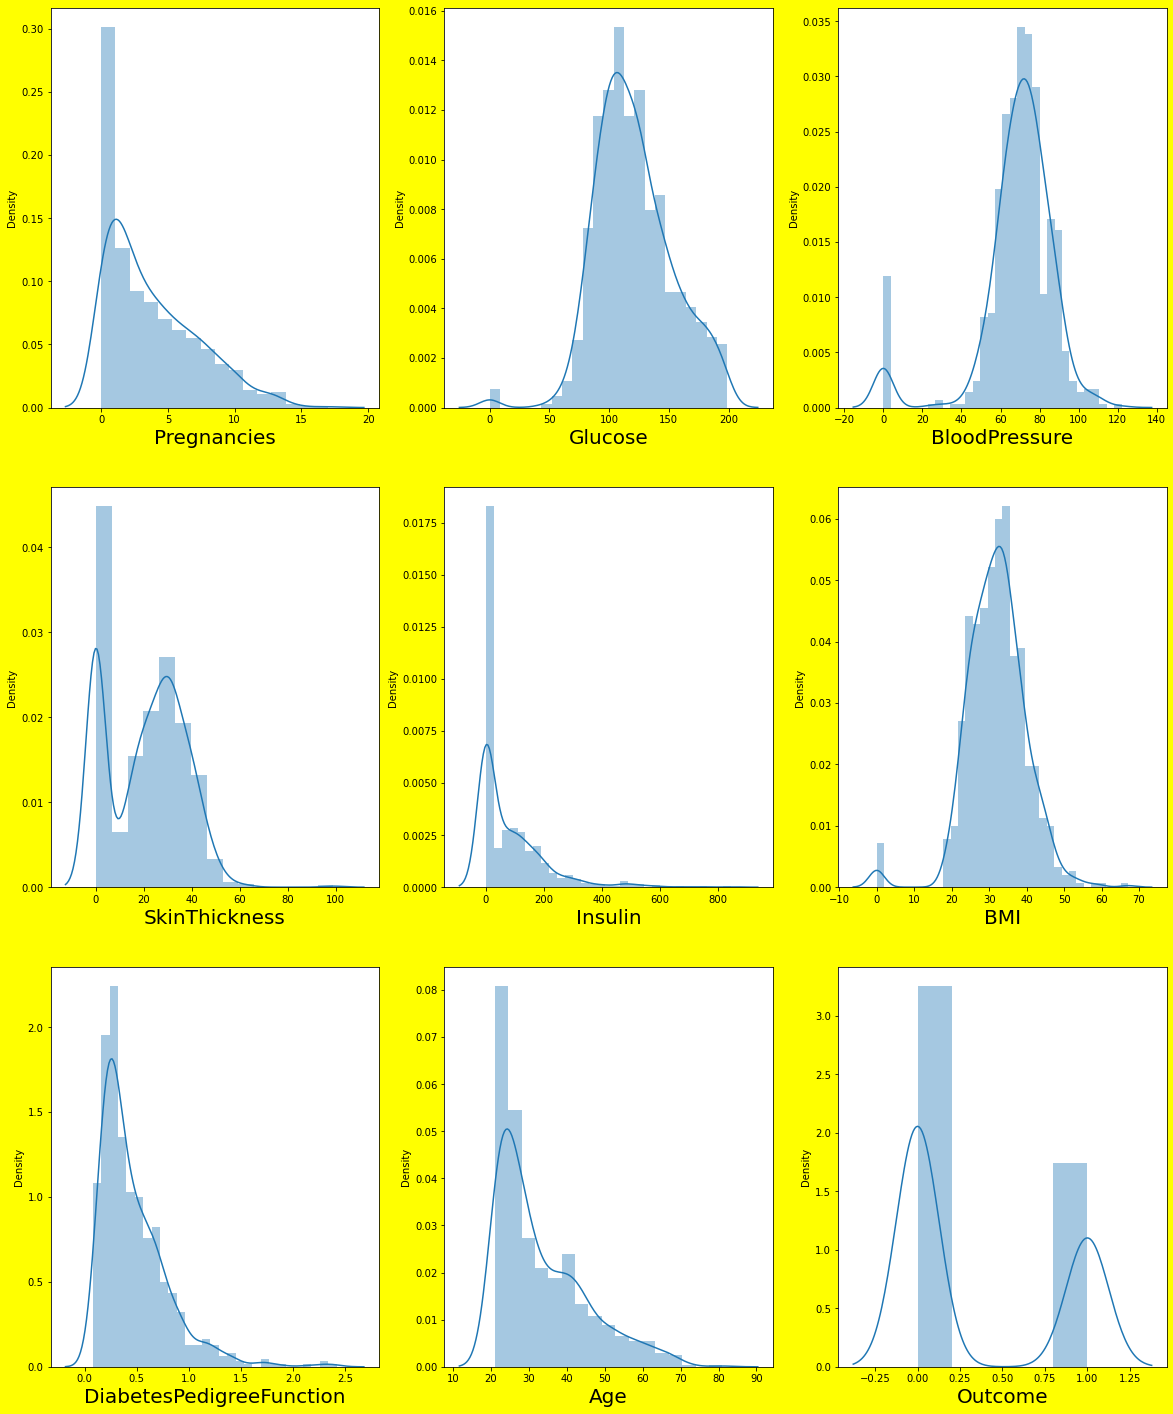

In [145]:
#lets visualize and analyse the data

plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [146]:
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())

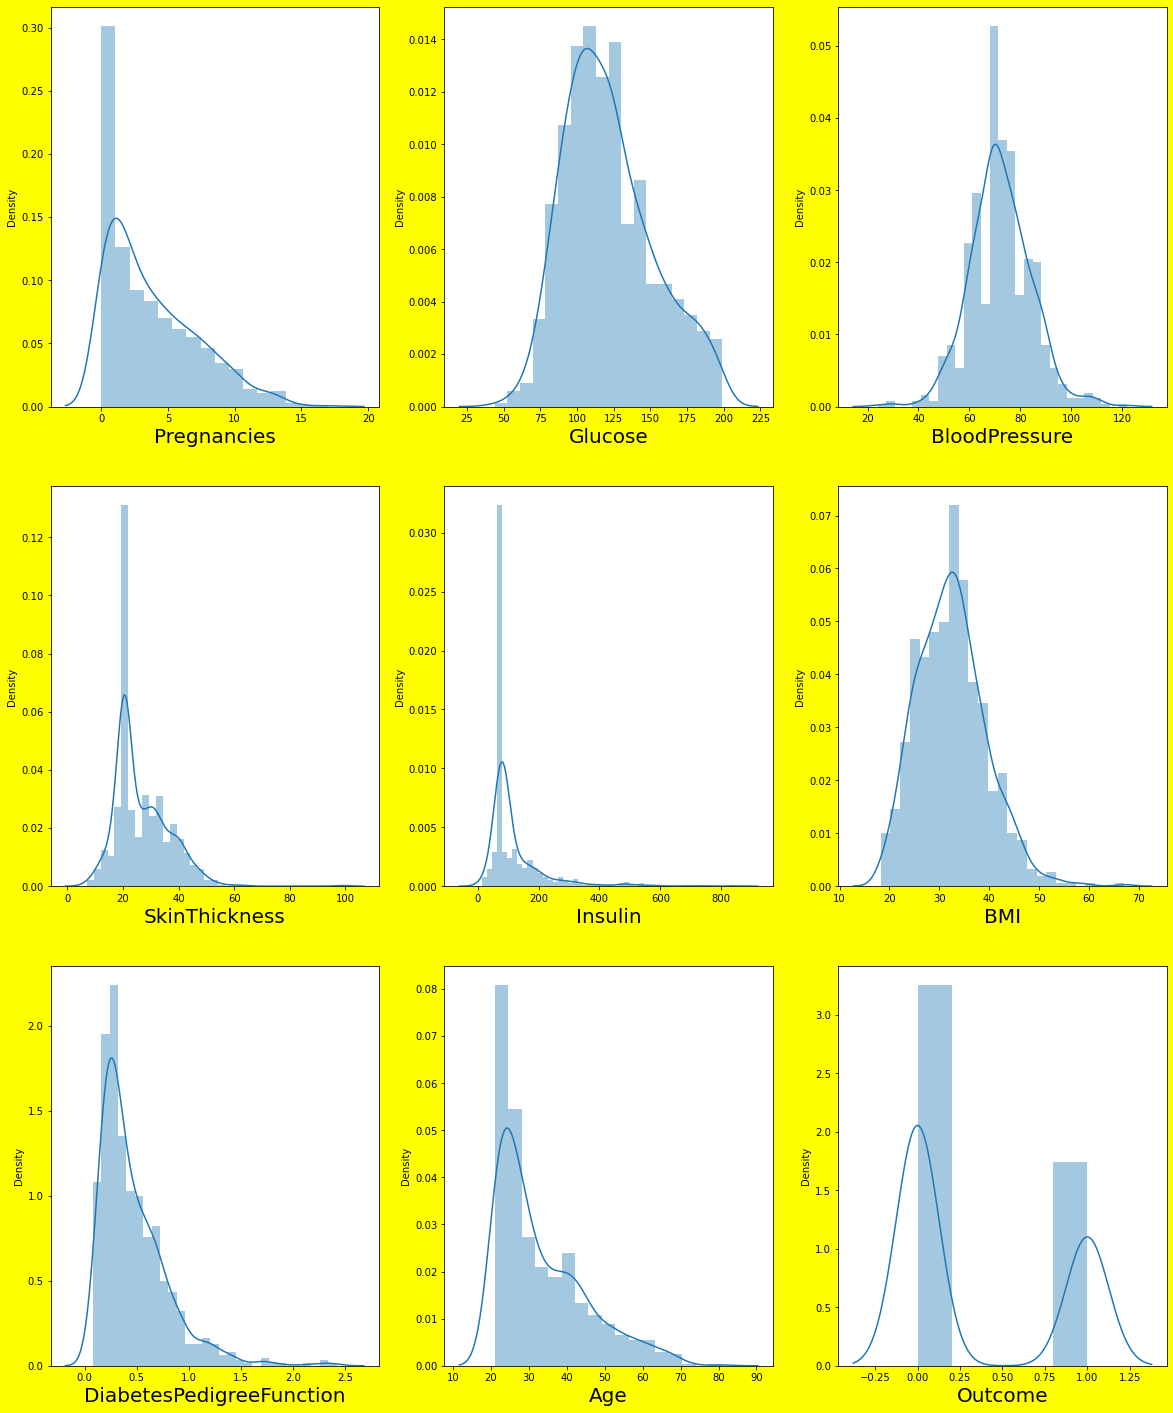

In [147]:
#lets visualize and analyse the data

plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [148]:
df_features=data.drop('Outcome',axis=1)

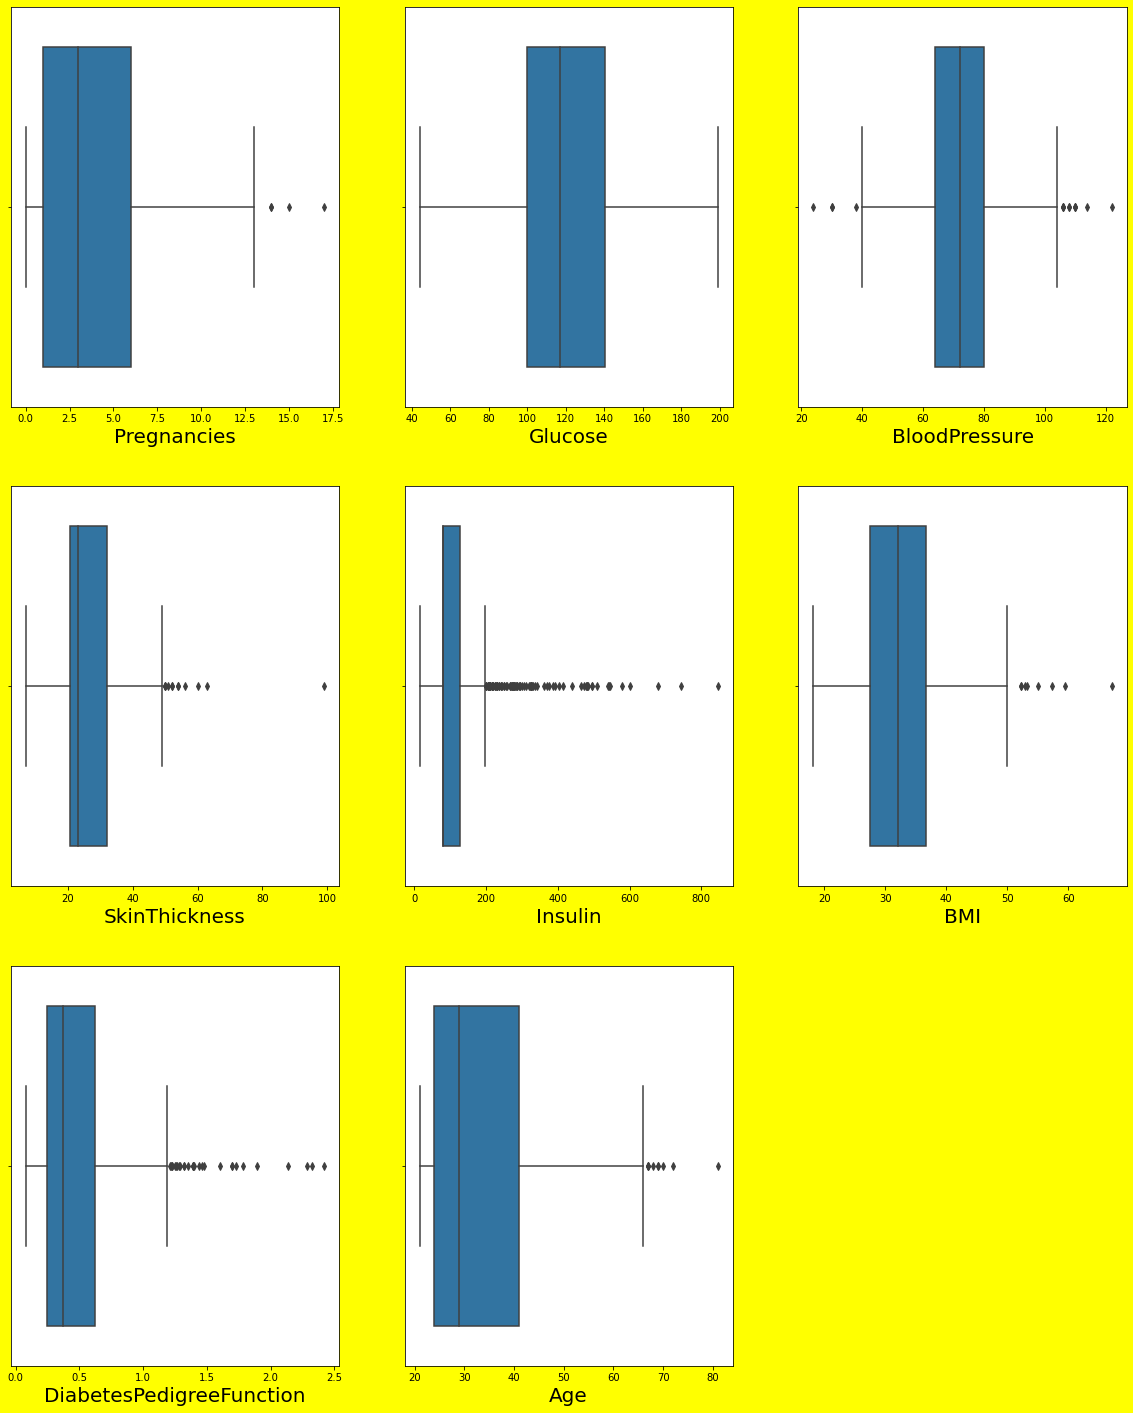

In [149]:
#lets visualize and analyse the data

plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1

for column in df_features:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df_features[column],orient='v')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [150]:
q1=data.quantile(0.25)

In [151]:
q3=data.quantile(0.75)

In [152]:
iqr=q3-q1

In [153]:
preg_high=(q3.Pregnancies + (1.5 * iqr.Pregnancies))
preg_high

13.5

In [154]:
index = np.where(data['Pregnancies'] > preg_high)
index

(array([ 88, 159, 298, 455], dtype=int64),)

In [155]:
data = data.drop(data.index[index])
data.shape

(764, 9)

In [156]:
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
759,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
760,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
761,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
762,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [157]:
bp_high =(q3.BloodPressure + (1.5 * iqr.BloodPressure))
bp_high

104.0

In [158]:
index = np.where(data['BloodPressure'] > bp_high)
index

(array([ 43,  84, 105, 175, 359, 545, 654, 658, 668, 687], dtype=int64),)

In [159]:
data = data.drop(data.index[index])
data.shape

(754, 9)

In [160]:
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
749,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
750,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
751,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
752,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [161]:
st_high=(q3.SkinThickness + (1.5 * iqr.SkinThickness))
print (st_high)

49.1953125


In [162]:
index = np.where(data['SkinThickness'] > st_high)
index

(array([ 56,  84,  96, 116, 146, 205, 267, 269, 437, 523, 569, 581],
       dtype=int64),)

In [163]:
data = data.drop(data.index[index])
data.shape

(742, 9)

In [164]:
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
737,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
738,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
739,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
740,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [165]:
ins_high=(q3.Insulin + (1.5 * iqr.Insulin))
print (ins_high)

198.42578125


In [166]:
index = np.where(data['Insulin'] > ins_high)
index

(array([  8,  13,  16,  20,  31,  39,  52,  53,  55,  71,  90, 104, 124,
        131, 136, 144, 152, 175, 184, 188, 195, 203, 208, 216, 219, 235,
        236, 242, 246, 265, 272, 273, 282, 283, 294, 305, 320, 344, 345,
        348, 354, 359, 372, 376, 379, 393, 396, 399, 408, 409, 435, 440,
        462, 467, 468, 469, 493, 501, 519, 521, 526, 527, 535, 541, 554,
        563, 572, 584, 586, 590, 623, 633, 635, 648, 654, 660, 669, 674,
        681, 684, 687, 689, 695, 722, 727], dtype=int64),)

In [167]:
data = data.drop(data.index[index])
data.shape

(657, 9)

In [168]:
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
652,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
653,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
654,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
655,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [169]:
BMI_high=(q3.BMI + (1.5 * iqr.BMI))
print (BMI_high)

50.25


In [170]:
index = np.where(data['BMI'] > BMI_high)
index

(array([105, 164, 254], dtype=int64),)

In [171]:
data = data.drop(data.index[index])
data.shape

(654, 9)

In [172]:
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
649,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
650,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
651,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
652,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [173]:
DPF_high=(q3.DiabetesPedigreeFunction + (1.5 * iqr.DiabetesPedigreeFunction))
print (DPF_high)

1.2


In [174]:
index = np.where(data['DiabetesPedigreeFunction'] > st_high)
index

(array([], dtype=int64),)

In [175]:
data = data.drop(data.index[index])
data.shape

(654, 9)

In [176]:
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
649,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
650,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
651,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
652,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [177]:
age_high=(q3.Age + (1.5 * iqr.Age))
print (age_high)

66.5


In [178]:
index = np.where(data['Age'] > st_high)
index

(array([  0,   8,  11,  12,  17,  20,  24,  26,  56,  78,  96, 103, 108,
        117, 124, 171, 173, 177, 184, 186, 197, 216, 220, 230, 233, 238,
        239, 246, 248, 266, 289, 304, 305, 337, 382, 384, 386, 400, 402,
        406, 412, 418, 421, 432, 434, 438, 439, 457, 460, 464, 467, 471,
        474, 493, 498, 511, 519, 523, 547, 561, 566, 572, 574, 581, 595,
        606, 608, 622, 636, 643, 645, 649], dtype=int64),)

In [179]:
data = data.drop(data.index[index])
data.shape

(582, 9)

In [180]:
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
1,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
2,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
3,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
577,762,9,89.0,62.0,20.536458,79.799479,22.5,0.142,33,0
578,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
579,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
580,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [181]:
bp_low =(q1.BloodPressure - (1.5 * iqr.BloodPressure))
print (bp_low)

40.0


In [182]:
index = np.where(data['BloodPressure'] < bp_low)
index

(array([ 11, 450, 452], dtype=int64),)

In [183]:
data = data.drop(data.index[index])
data.shape

(579, 9)

In [184]:
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
1,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
2,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
3,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
574,762,9,89.0,62.0,20.536458,79.799479,22.5,0.142,33,0
575,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
576,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
577,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


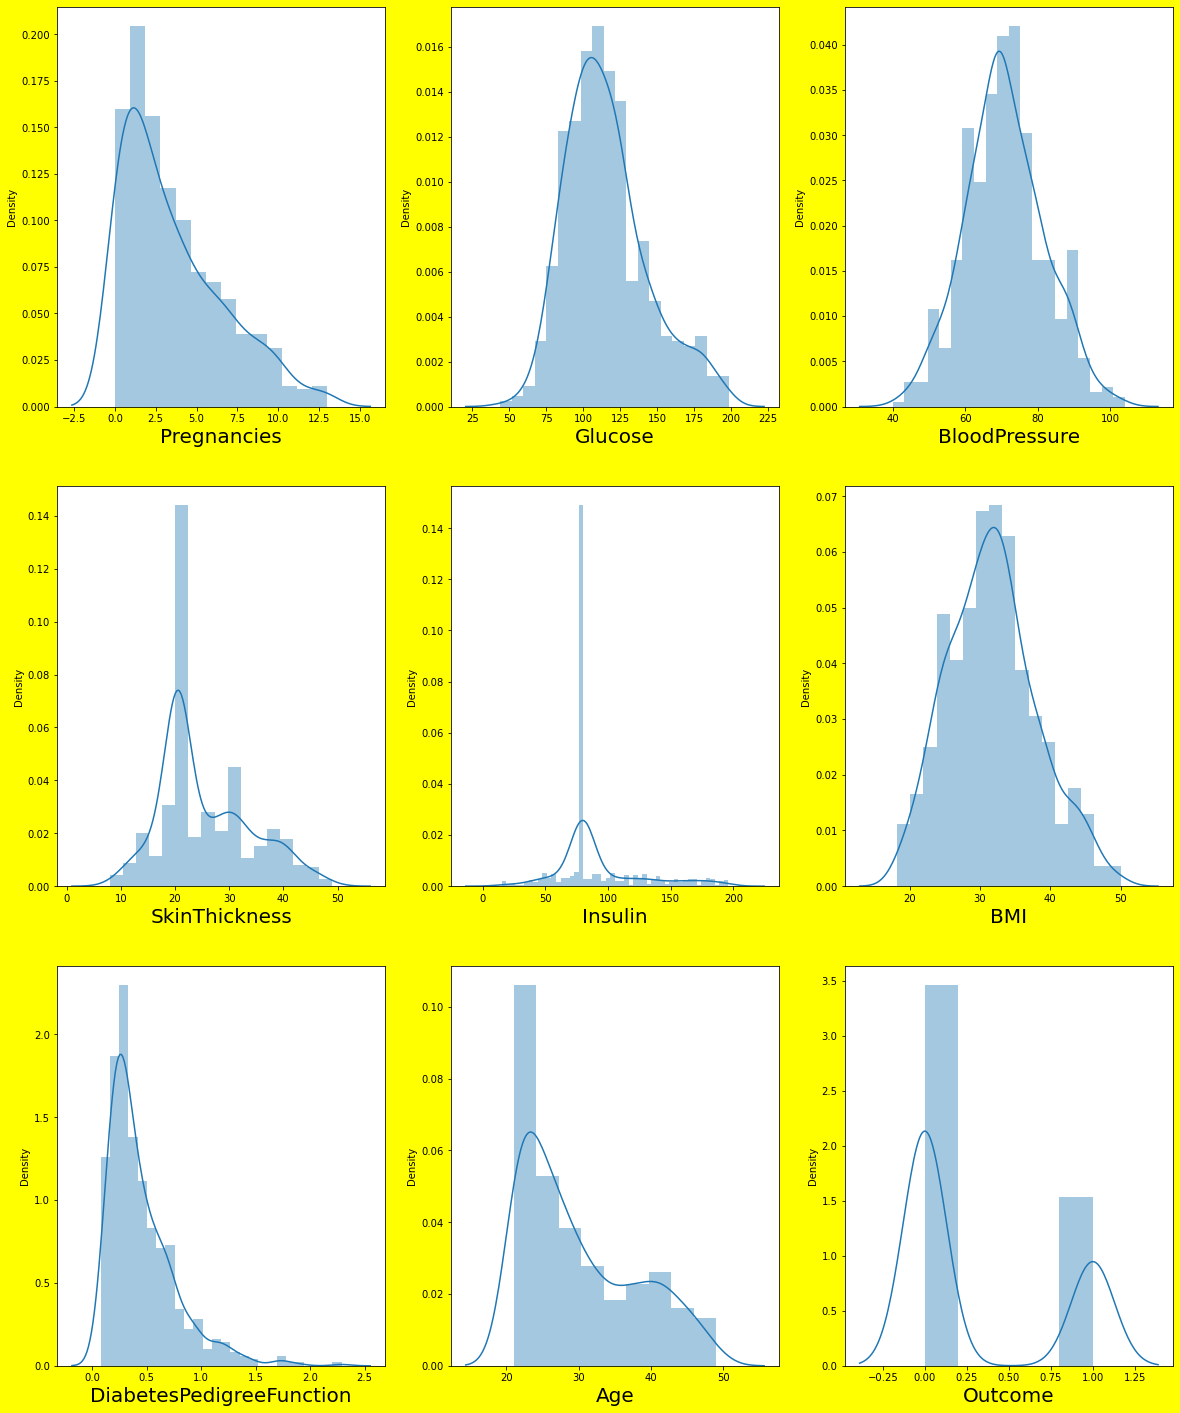

In [192]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [188]:
X =data.drop(columns=['Outcome'])
y= data['Outcome']

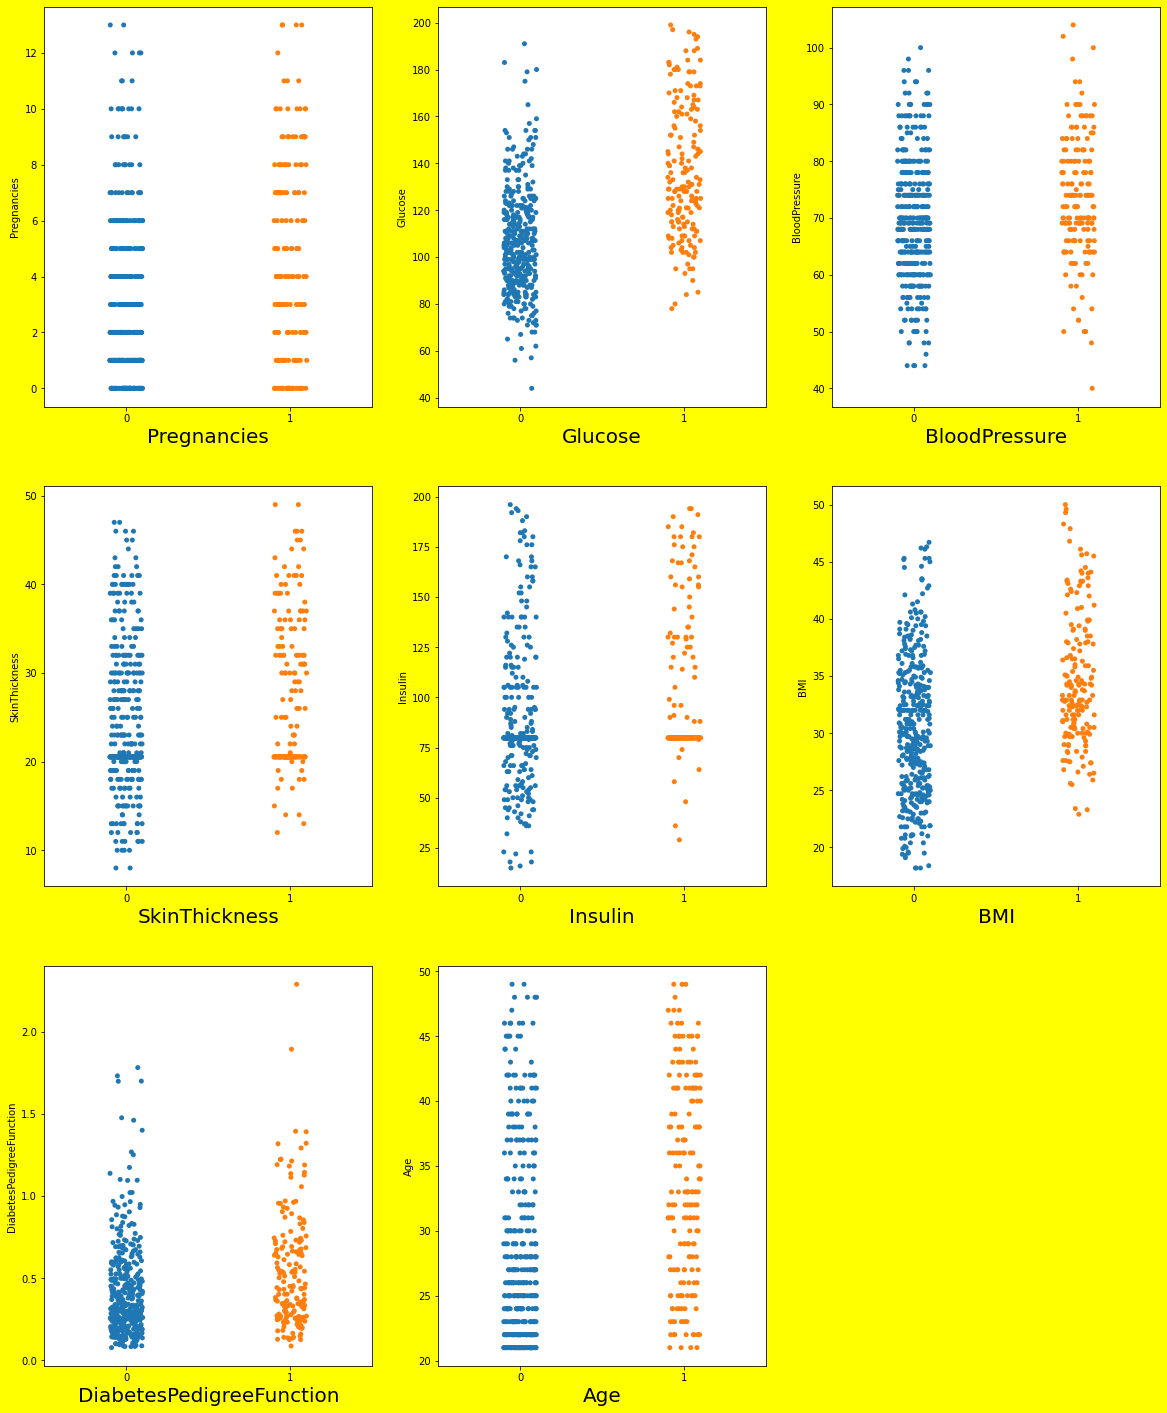

In [189]:
#lets visualize and analyse the data

plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1

for column in X:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [198]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [199]:
X_scaled.shape[1]

8

In [200]:
vif=pd.DataFrame()

In [201]:
vif["vif"]= [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]

In [203]:
vif["Features"]=X.columns
vif

,vif,Features
0,1.709397,Pregnancies
1,1.225687,Glucose
2,1.224401,BloodPressure
3,1.429580,SkinThickness
4,1.189414,Insulin
5,1.520095,BMI
6,1.045747,DiabetesPedigreeFunction
7,1.901792,Age


In [ ]:
#so as we can see all vif values have values less than 5 .That means no multicollinearilty.Now, we can go ahead with fitting our model.Before,we split our data into train and testing set.

In [205]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=40)

In [206]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [207]:
#now how well our model works on test data
y_pred = log_reg.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [208]:
#model accuracy
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8

In [209]:
#confusion matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat


array([[87, 10],
       [19, 29]], dtype=int64)

In [210]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        97
           1       0.74      0.60      0.67        48

    accuracy                           0.80       145
   macro avg       0.78      0.75      0.76       145
weighted avg       0.80      0.80      0.79       145



In [211]:
#ROC_curve
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

In [212]:
#threshold [0] means no instance predicted(it should be read from 0 - max)
print ('Threshold=',thresholds)
print ('False positive rate=',fpr)
print ('True positive rate=',tpr)

Threshold= [2 1 0]
False positive rate= [0.         0.10309278 1.        ]
True positive rate= [0.         0.60416667 1.        ]


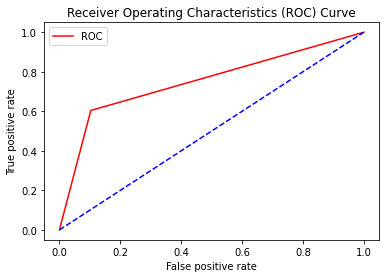

In [215]:
#lets see ROC curve
plt.plot(fpr,tpr,color='red',label='ROC')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristics (ROC) Curve')
plt.legend()
plt.show()